# Meta-Heur√≠ticas : Trabalho Pr√°tico 1 

- Aym√™ Faustino dos Santos - 4704
- Pedro Augusto Martins Pereira - 4692
- Henrique Alves Campos - 4231

O trabalho consiste em implementar duas meta-heur√≠ticas para minimizar duas fun√ß√µes objetivo, cada uma em dois intervalos diferentes, sendo o segundo, um intervado mais restrito contido no primeiro intervalo.

## Bibliotecas Necessarias

In [59]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Fun√ß√µes Objetivo 

### 1.1 Representa√ß√£o da Solu√ß√£o

Vamos utilizar um vetor para representar as vari√°veis de decis√£o. Na fun√ß√£o objetivo 1 ele ter√° tamanho dois pois temos duas variaveis de decis√£o po≈ïem na fun√ß√£o objetivo 2 temos quatro variaveis de decis√£o sendo assim ele ter√° tamanho quatro.

### 1.2 Fun√ß√£o Objetivo 1



1.2.1 Intervalos 

a) - 100 <= x1 e x2 <= 100

b) -20 <= x1 e x2 <= 20

In [60]:
def funcao_objetivo_01(solucao):
    sum_sq = np.sum(np.square(solucao))
    raiz = np.sqrt(sum_sq)
    return 1 - np.cos(2 * np.pi * raiz) + 0.1 * raiz

intervalo1_a = [-100,100]
intervalo1_b = [-20,20]

1.2.2 Superficie

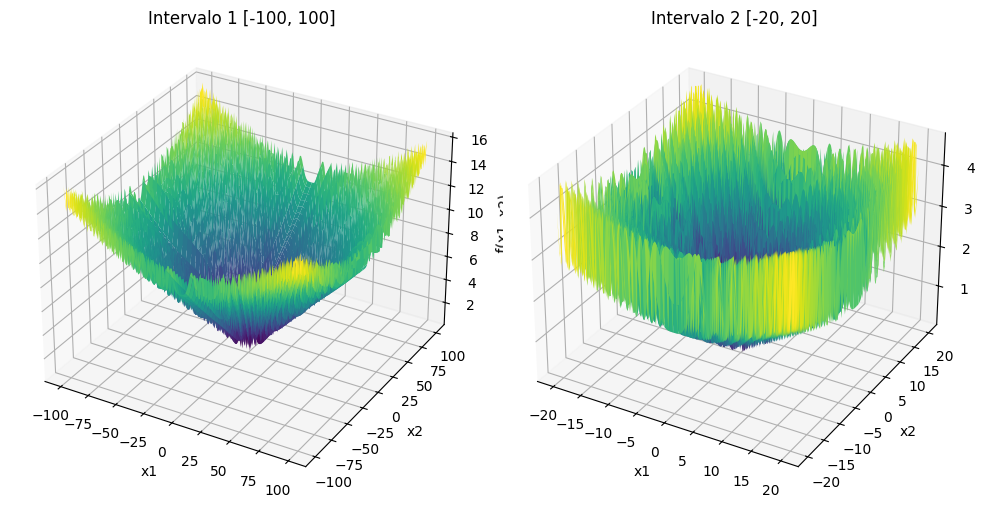

In [61]:
def plotar_superficies(intervalos, titulos):
    fig = plt.figure(figsize=(10, 5))  

    for i, (intervalo, titulo) in enumerate(zip(intervalos, titulos), start=1):
        x = np.linspace(intervalo[0], intervalo[1], 200)
        y = np.linspace(intervalo[0], intervalo[1], 200)
        X, Y = np.meshgrid(x, y)

        Z = np.array([[funcao_objetivo_01([x_, y_]) for x_, y_ in zip(x_row, y_row)] 
                      for x_row, y_row in zip(X, Y)])

        ax = fig.add_subplot(1, 2, i, projection='3d')  # 1 linha, 2 colunas
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(titulo)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('f(x1, x2)')

    plt.tight_layout()
    plt.show()

intervalos = [(-100, 100), (-20, 20)]
titulos = ['Intervalo 1 [-100, 100]', 'Intervalo 2 [-20, 20]']
plotar_superficies(intervalos, titulos)

### 1.3 Fun√ß√£o Objetivo 2

1.3.1 Intervalos

a)‚àí10 ‚â§ ùë•1, ùë•2, ùë•3, ùë•4 ‚â§ 10

b)‚àí2 ‚â§ ùë•1, ùë•2, ùë•3, ùë•4 ‚â§ 2

In [62]:
def funcao_objetivo_02(x):
    return (100 * (x[0]**2 - x[1])**2 +
            (x[0] - 1)**2 +
            (x[2] - 1)**2 +
            90 * (x[2]**2 - x[3])**2 +
            10.1 * ((x[1] - 1)**2 + (x[3] - 1)**2) +
            19.8 * (x[1] - 1) * (x[3] - 1))

intervalo2_a = [-10,10]
intervalo2_b = [-2,2]

1.3.2 Superficie

Como a fun√ß√£o f(x) depende de quatro vari√°veis, foi necess√°rio fixar x‚ÇÉ e x‚ÇÑ para permitir a visualiza√ß√£o em 3D. Assim, foi poss√≠vel analisar o comportamento da fun√ß√£o variando apenas x‚ÇÅ e x‚ÇÇ.

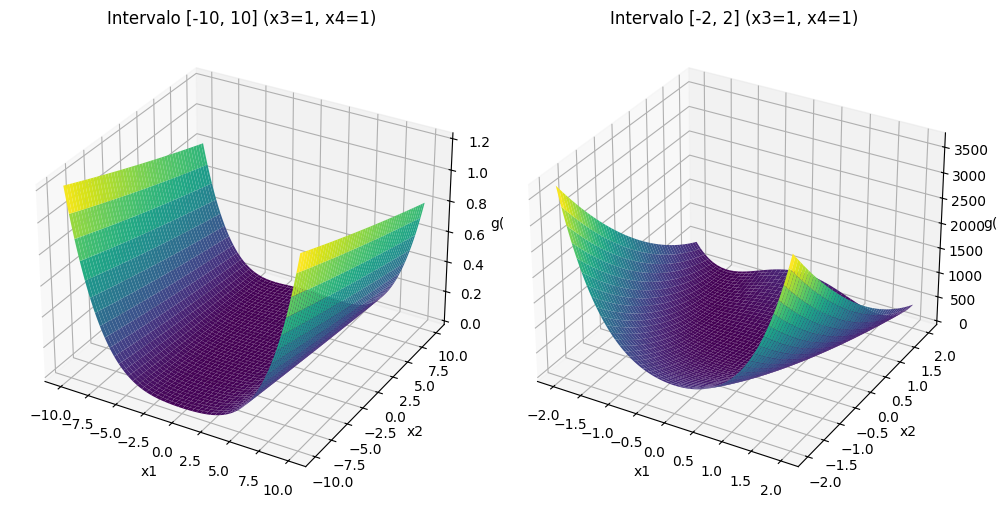

In [63]:
def plotar_superficies_2(intervalos, titulos, x3=1, x4=1):
    fig = plt.figure(figsize=(10, 5))

    for i, (intervalo, titulo) in enumerate(zip(intervalos, titulos), start=1):
        x = np.linspace(intervalo[0], intervalo[1], 200)
        y = np.linspace(intervalo[0], intervalo[1], 200)
        X, Y = np.meshgrid(x, y)

        Z = np.array([[funcao_objetivo_02([x_, y_, x3, x4]) for x_, y_ in zip(x_row, y_row)]
                      for x_row, y_row in zip(X, Y)])

        ax = fig.add_subplot(1, 2, i, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(f"{titulo} (x3={x3}, x4={x4})")
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('g(x)')

    plt.tight_layout()
    plt.show()

intervalo2_a = (-10, 10)
intervalo2_b = (-2, 2)
titulos = ["Intervalo [-10, 10]", "Intervalo [-2, 2]"]

plotar_superficies_2([intervalo2_a, intervalo2_b], titulos)

## 2. Meta-Heuristicas

Para minimiziar as fun√ß√µes objetivos vamos utilizar um algoritmo baseado em VNS (Variable Neighborhood Search) e um algoritmo baseado em #Escolher. Antes de implementar cada um deles vamos entender a ideia de cada uma dessas meta-heuristicas e quais decis√µes precisam ser tomadas em cada uma delas.

### 2.1 VNS (Variable Neighborhood Search) 

O Variable Neighborhood Search (VNS) √© uma metaheur√≠stica baseada na explora√ß√£o sistem√°tica de diferentes vizinhan√ßas para encontrar a solu√ß√£o √≥tima de um problema. A principal motiva√ß√£o do VNS √© evitar ficar preso em √≥timos locais, expandindo a busca para outras regi√µes do espa√ßo de solu√ß√µes.

Ele se baseia na seguinte ideia:
- Se uma solu√ß√£o √© um √≥timo local em uma vizinhan√ßa, ela pode n√£o ser em outra.
- Alternar entre diferentes vizinhan√ßas ajuda a escapar de √≥timos locais e encontrar melhores solu√ß√µes.

VNS √© eficiente, simples e vers√°til, sendo utilizado em problemas de otimiza√ß√£o combinat√≥ria e cont√≠nua.

#### 2.1.1 Pseudoc√≥digo do VNS B√°sico

Entrada: solu√ß√£o inicial `x`, n√∫mero m√°ximo de vizinhan√ßas `k_max`, n√∫mero m√°ximo de itera√ß√µes

1. x_best ‚Üê x

2. Para t = 1 at√© max_iter fa√ßa:

    3. k ‚Üê 1

    4. Enquanto k ‚â§ k_max fa√ßa:

        5.   Gerar x' na k-√©sima vizinhan√ßa de x_best

        6.   Aplicar busca local a partir de x', obtendo x''

        7.   Se f(x'') < f(x_best):

        8.       x_best ‚Üê x''

        9.       k ‚Üê 1   // reinicia vizinhan√ßa

        10.  Sen√£o:

        11.      k ‚Üê k + 1
        
12. Retornar x_best



Decis√µes importantes na implementa√ß√£o do VNS

- Solu√ß√£o Inicial
- Estrutura de Vizinhan√ßa
- Condi√ß√µes de Parada
- Estrat√©gia de Busca Local
- Quantidade de vizinhan√ßas (k_max)

### 2.1.2 Solu√ß√£o Inicial

Como a solu√ß√£o ser√° representada por meio de um vetor, uma estrat√©gia simples e muito utilizada na inicializa√ß√£o √© a de gerar uma solu√ß√£o aleat√≥ria preenchendo as posi√ß√µes do vetor com valores que estejam dentro de um intervalo pr√© definido para cada vari√°vel.

### 2.1.3 Metodo de busca local

#### Hill Climbing


O Hill Climbing √© um m√©todo de busca local que usa um procedimento de melhora iterativa, ou seja, a cada itera√ß√£o ele tenta melhorar a solu√ß√£o corrente sendo portanto um algoritmo gulosa que n√£o aceita piora. Seu algorimo para problemas de minimiza√ß√£o √©:

```
s --> solu√ß√£o candidata inicial
repita 
    r = perturba(copia(s)) --> faz uma perturba√ß√£o pequena na solu√ß√£o corrente para encontrar um nova solu√ß√£o
    se qualidade(r)<qualidade(s) ent√£o --> compara o valor da fun√ß√£o objetivo na nova solu√ß√£o com o da solu√ß√£o corrente
        s = r --> se melhoran atualiza solucao corrente
    --> se n√£o melhora n√£o faz nada
at√© condi√ß√£o de parada
retorne s
```

Analisando o algoritmo √© preciso definir:
* Como obter solu√ß√£o Inicial
* Como pertubarr uma solu√ß√£o
* Condi√ß√£o de Parada

#### Solu√ß√£o Inicial

Como o Hill Climbing vai ser utilizado como uma etapa do VNS a solu√ß√£o canditada vai ser definida no VNS.

#### Pertubar Solu√ß√£o

A caracter√≠stica do Hill Climbing √© de fazer pequenas pertuba√ß√µes na solu√ß√£o corrente e isso pode ser feito adicionando um pequeno valor aleat√≥rio, chamado de ru√≠do, em cada vari√°vel de decis√£o. Entretanto, saber se √© uma pertuba√ß√£o pequena √© um desafio. Uma poss√≠vel estrat√©gia √© fazer um ru√≠do de no m√°ximo 5% em rela√ß√£o ao valor corrente.

Ser√° utilizado um algoritmo que recebe o intervalo da porcentagem do ru√≠do como par√¢metro e escolhe aleatoriamente uma valor desse intervalo. Isso permite que o m√©todo seja generalista uma vez que poder√° ser usado tamb√©m para fazer perturba√ß√µes maiores. O pseudoc√≥digo do algoritmo √©:

```
min = valor minimo desejado para um elemento do vetor
max = valor minimo desejado para um elemento do vetor

min_ruido = porcentagem m√≠nima do ru√≠do
max_ruido = porcentagem m√°xima do ru√≠do

v = quantidade de variaveis de decisao
vetor[v] = solucao a ser perturbada

p = probabilidade de adicionar ru√≠do em um elemento do vetor (normalmente 1)

for i from 1 to v do --> para cada elemento do vetor de vari√°veis
    if p ‚â• numero aleatorio [0.0,1.0] entao
        do
            porcentagem_ruido = numero aleatorio [min_ruido, max_ruido]
            ruido = solucao[i] * porcentagem_ruido
            r = numero aleatorio [-ruido,ruido] --> pode ser um valor positivo ou negativo
        while min ‚â§ vetor[i] + r ‚â§ max --> conferir se continua atendendo √†s restri√ß√µes ap√≥s a perturba√ß√£o
        vetor[i] = vetor[i] + r
return vetor
```

Para as pequenas pertuba√ß√µes vamos utilizar um ruido de 3% a 5%

#### Condi√ß√£o de parada

Existem v√°rias estrat√©gias que podem ser adotadas como condi√ß√£o de parada, como:
* certa quantidade de itera√ß√µes realizadas
* certa quantidade de avalia√ß√µes da fun√ß√£o objetivo realizadas
* limite de tempo gasto
* certo n√∫mero de itera√ß√µes sme melhoria da solu√ß√£o atual

Na implementa√ß√£o do Hill Climbing o crit√©rio de parada ser√° realizar 5 itera√ß√µes sem melhoria da solu√ß√£o atual 

### 2.1.4 Gerar solu√ß√£o inicial aleatoria

In [64]:
def solucaoInicialAleatoria(min, max, qtdVariaveisDecisao):
    v = []
    for i in range(qtdVariaveisDecisao):
        v.append(random.uniform(min[i], max[i]))
    return np.array(v)

### 2.1.5 Gerar pertuba√ß√µes 

In [65]:
def pertubacao(solucao, min, max, min_ruido, max_ruido, qtdVariaveisDecisao):
    nova_solucao = []
    for i in range(qtdVariaveisDecisao):
        ruido = random.uniform(min_ruido, max_ruido)
        perturbacao = solucao[i] + ruido * (random.uniform(min[i], max[i]) - solucao[i])
        nova_solucao.append(perturbacao)
    return np.array(nova_solucao)


### 2.1.6 Hill Climbing 

In [66]:
def hillClimbing(solucao, funcaoObjetivo, min, max, qtdVariaveisDecisao):
    min_ruido = 0.03
    max_ruido = 0.05
    semMudanca = 0

    while True:
        # Passando qtdVariaveisDecisao para a fun√ß√£o pertubacao
        novaSolucao = pertubacao(solucao.copy(), min, max, min_ruido, max_ruido, qtdVariaveisDecisao)
        
        if funcaoObjetivo(novaSolucao) < funcaoObjetivo(solucao): 
            solucao = novaSolucao
            semMudanca = 0
        else:
            semMudanca += 1
            
        if semMudanca == 5:
            break

    return solucao


### 2.1.7 VNS

In [67]:
def vns(funcaoObjetivo, min, max, qtdVariaveisDecisao, k_max=5, max_iter=100):
    solucao_inicial = solucaoInicialAleatoria(min, max, qtdVariaveisDecisao)

    solucao_corrente = solucao_inicial
    melhor_solucao = solucao_inicial
    melhor_valor = funcaoObjetivo(melhor_solucao)

    iter_total = 0
    iteracoes_sem_melhora = 0

    while iter_total < max_iter:
        k = 1
        while k <= k_max:
            # Gera nova solu√ß√£o e aplica busca local
            nova_solucao = solucao_corrente + np.random.uniform(-1, 1, size=solucao_corrente.shape)
            nova_solucao = hillClimbing(nova_solucao, funcaoObjetivo, min, max, qtdVariaveisDecisao)
            valor_nova_solucao = funcaoObjetivo(nova_solucao)

            if valor_nova_solucao < melhor_valor:
                # Melhorou: aceita e zera contador de estagna√ß√£o
                melhor_solucao = nova_solucao
                melhor_valor = valor_nova_solucao
                solucao_corrente = nova_solucao
                iteracoes_sem_melhora = 0
                k = 1
            else:
                # N√£o melhorou
                iteracoes_sem_melhora += 1

                if iteracoes_sem_melhora >= 3:
                    # Ap√≥s 3 sem melhora, aceita mesmo assim (explora√ß√£o)
                    solucao_corrente = nova_solucao

                k += 1

        iter_total += 1

    return melhor_solucao



#### Fun√ß√£o Auxiliar Para Plotar um Gr√°fico com o Valor Final da Fun√ß√£o Objetivo em cada Itera√ß√£o

In [68]:
def objetivoFinalCadaIteracao(valores, target, titulo):
    plt.figure(figsize=(15, 8))
    min_index = np.argmin(valores[target])  # Encontra o √≠ndice do melhor valor (m√≠nimo)
    
    # Plotar os valores da fun√ß√£o objetivo
    plt.plot(range(1, len(valores[target]) + 1), valores[target], linestyle='-', label=target, color='lightgreen')
    
    # Adicionar pontos no gr√°fico e exibir os valores
    for i in range(len(valores[target])):
        if i == min_index:
            # Para o melhor valor (m√≠nimo), destaca o ponto
            plt.scatter(i + 1, valores[target][i], color='lightgreen', marker='o')
            plt.text(i + 1, valores[target][i], f'{valores[target][i]:.6f}', fontsize=12, fontweight='bold', ha='center', va='bottom', color='purple')
            plt.text(i + 1, valores[target][i], f'x1 = {valores["x1"][i]:.4f} \nx2 = {valores["x2"][i]:.4f}', fontsize=10, fontweight='bold', ha='center', va='top', color='black')
        else:
            # Para os outros valores, n√£o destaca o ponto
            plt.scatter(i + 1, valores[target][i], color='lightgreen', marker='o')
            plt.text(i + 1, valores[target][i], f'{valores[target][i]:.6f}', fontsize=8, ha='center', va='center', color='black')
    

    plt.xticks([i for i in range(1, len(valores[target]) + 1)])
    plt.xlabel('Execu√ß√µes')  # Altere para "Execu√ß√µes" ou o que fizer sentido
    plt.ylabel('Valor da fun√ß√£o objetivo')
    plt.title(f'Valor Final da Fun√ß√£o Objetivo em cada Execu√ß√£o do {titulo}')
    plt.legend()
    plt.grid(True)
    plt.show()


#### Intervalo 1A

In [69]:
# Inicializando o dicion√°rio para armazenar os resultados
vns_1a = {'x1': [], 'x2': [], 'f(x1,x2)': []}

# Definindo os intervalos para as vari√°veis
min_intervalo = intervalo1_a[0]
max_intervalo = intervalo1_a[1]

# Rodando o algoritmo VNS 30 vezes com diferentes quantidades de vari√°veis de decis√£o
for i in range(30):
    # Aqui voc√™ pode definir dinamicamente a quantidade de vari√°veis de decis√£o
    qtdVariaveisDecisao = 2
    
    # Chamada ao VNS com a quantidade de vari√°veis de decis√£o
    solucao = vns(funcao_objetivo_01, [min_intervalo] * qtdVariaveisDecisao, [max_intervalo] * qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    # Armazenando os resultados no dicion√°rio
    vns_1a['x1'].append(solucao[0])  # Adiciona o valor de x1
    vns_1a['x2'].append(solucao[1])  # Adiciona o valor de x2 (isso s√≥ funcionar√° corretamente se qtdVariaveisDecisao for 2 ou mais)
    vns_1a['f(x1,x2)'].append(funcao_objetivo_01(solucao))  # Calcula e armazena o valor da fun√ß√£o objetivo
    
# Imprimindo os resultados
print(vns_1a)


{'x1': [np.float64(-0.047666706797246716), np.float64(0.02653171863435899), np.float64(-0.9209979513861479), np.float64(0.03549401487467163), np.float64(0.48393663664663156), np.float64(0.025667073528040207), np.float64(1.0014297818235383), np.float64(0.9856332888703196), np.float64(0.01486461298247388), np.float64(-0.7562320574240768), np.float64(-0.03768024910517109), np.float64(-0.7686639749965112), np.float64(0.045486575086314374), np.float64(0.006800008303220029), np.float64(0.5757259546934202), np.float64(-0.1658693576343749), np.float64(-0.6071321578553275), np.float64(-0.8029489968513387), np.float64(0.987183103371178), np.float64(-0.05426783474568797), np.float64(0.03504238371296353), np.float64(-0.0295108112067477), np.float64(-0.01999870317159247), np.float64(0.03730351673788462), np.float64(0.0004640453458100158), np.float64(-0.03310041114164175), np.float64(0.18586577702074525), np.float64(0.0018489500980041207), np.float64(-0.982060583706873), np.float64(0.625369840326961

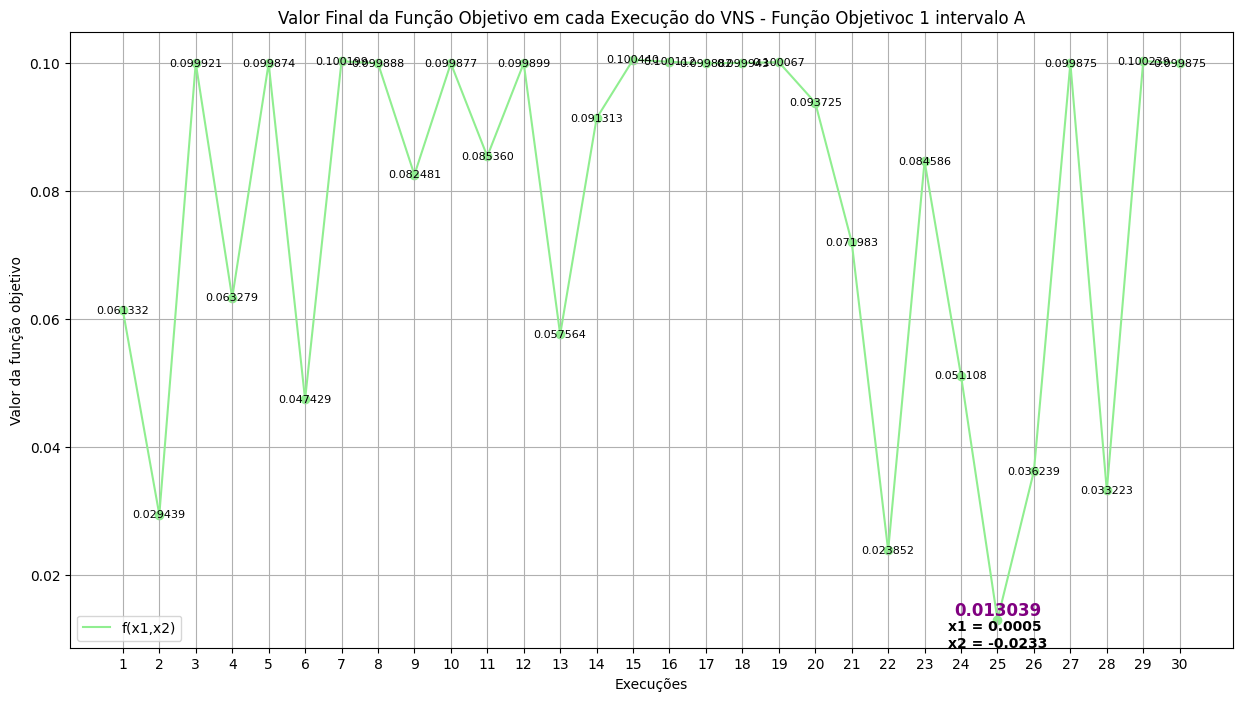

In [ ]:
objetivoFinalCadaIteracao(vns_1a, 'f(x1,x2)', 'VNS - Fun√ß√£o Objetivo 1 intervalo A')

#### Intervalo 1B

In [71]:
vns_1b = {'x1':[], 'x2':[], 'f(x1,x2)':[]} 

min = intervalo1_b[0] 
max = intervalo1_b[1]

qtdVariaveisDecisao = 2

for i in range(30):    
    # Chamada ao algoritmo VNS com a quantidade de vari√°veis de decis√£o
    solucao = vns(funcao_objetivo_01, [min] * qtdVariaveisDecisao, [max] * qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    # Armazenando os resultados no dicion√°rio
    vns_1b['x1'].append(solucao[0])  # Adiciona o valor de x1
    vns_1b['x2'].append(solucao[1])  # Adiciona o valor de x2
    vns_1b['f(x1,x2)'].append(funcao_objetivo_01(solucao))  # Calcula e armazena o valor da fun√ß√£o objetivo
    
# Imprimindo os resultados
print(vns_1b)

{'x1': [np.float64(-0.01944744078509686), np.float64(0.009626803544884432), np.float64(-0.019985394914282473), np.float64(-0.03502380369566299), np.float64(-0.021307136223291966), np.float64(0.01932783140069367), np.float64(-0.026099325111356514), np.float64(-0.015233588646267116), np.float64(-0.0041366936902104134), np.float64(0.03286535898102001), np.float64(-0.005792261748842176), np.float64(0.01103321742535085), np.float64(0.02008785584768702), np.float64(-0.0337227073432399), np.float64(-0.019838147380537907), np.float64(-0.025118025709336023), np.float64(-0.035986845984029375), np.float64(-0.006228448223506322), np.float64(-0.01705555134797565), np.float64(0.019054427488564167), np.float64(0.9715925163430982), np.float64(-0.016196107185933672), np.float64(-0.0004070441279644954), np.float64(-0.03796098462400732), np.float64(0.01730927695533302), np.float64(-0.9876130418129767), np.float64(-0.04868019171502502), np.float64(-0.006607869704718938), np.float64(-0.043819372508516086),

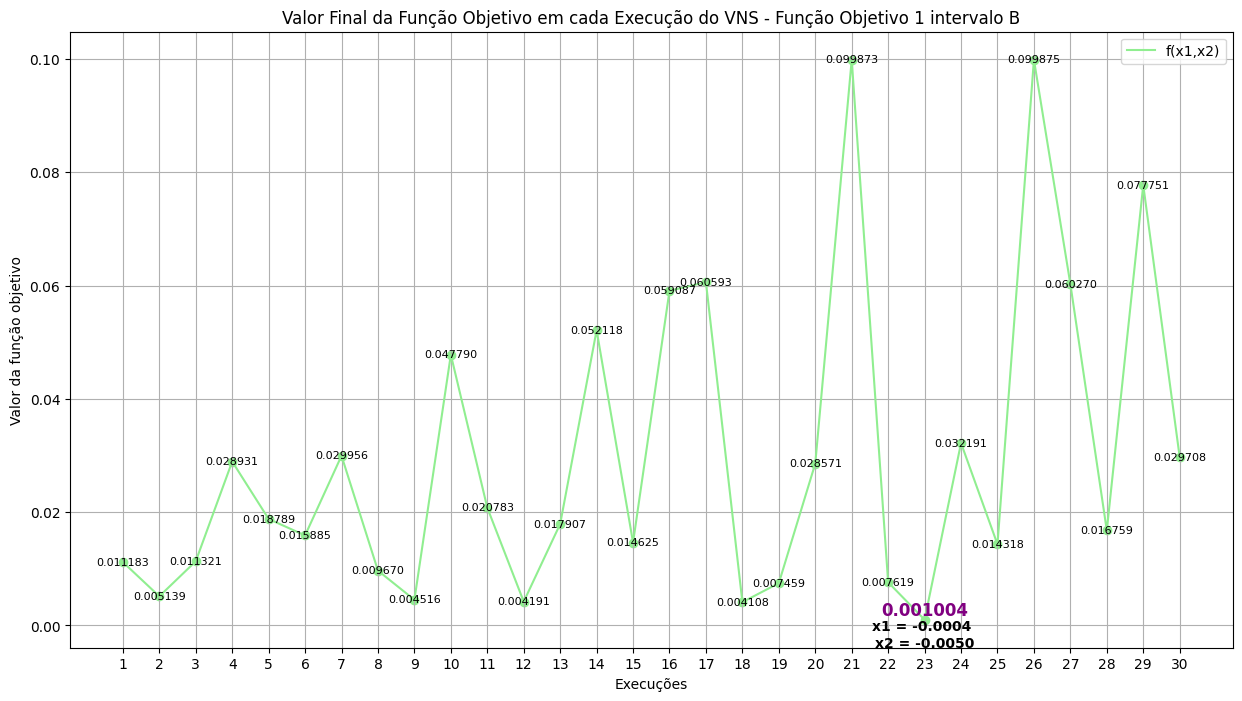

In [72]:
objetivoFinalCadaIteracao(vns_1b, 'f(x1,x2)', 'VNS - Fun√ß√£o Objetivo 1 intervalo B')

#### Intervalo 2A

In [73]:
vns_2a = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2a = intervalo2_a[0]  
max_2a = intervalo2_a[1]

qtdVariaveisDecisao=4

for i in range(30):
    # Chamada ao VNS com a quantidade de vari√°veis de decis√£o definida como 4
    solucao = vns(funcao_objetivo_02, [min_2a]* qtdVariaveisDecisao, [max_2a]* qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    # Armazenando os resultados no dicion√°rio
    vns_2a['x1'].append(solucao[0])
    vns_2a['x2'].append(solucao[1])
    vns_2a['x3'].append(solucao[2])
    vns_2a['x4'].append(solucao[3])
    vns_2a['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(solucao))

# Imprimindo os resultados
print(vns_2a)


{'x1': [np.float64(0.9245615479327964), np.float64(0.6622027493488655), np.float64(1.1839090084727792), np.float64(1.0254092668796846), np.float64(0.6433232764207543), np.float64(1.035040070544325), np.float64(0.6759952825874682), np.float64(1.2536786607077144), np.float64(1.228075404880407), np.float64(0.8371617445818005), np.float64(0.73814745212516), np.float64(1.00944798967044), np.float64(0.5318146420035265), np.float64(1.1656611689786294), np.float64(0.5678438561762837), np.float64(0.9606893135336637), np.float64(0.20584625202742393), np.float64(0.9243979104263782), np.float64(1.0606088711730393), np.float64(0.805631664851613), np.float64(0.888343313534945), np.float64(0.9248365893472201), np.float64(1.1411602862951031), np.float64(0.9021961506615932), np.float64(0.6095103309246077), np.float64(1.2058736984460094), np.float64(0.6645282374143322), np.float64(0.8853284976944814), np.float64(1.0375565525347228), np.float64(0.6267333765017242)], 'x2': [np.float64(0.8856300378916347),

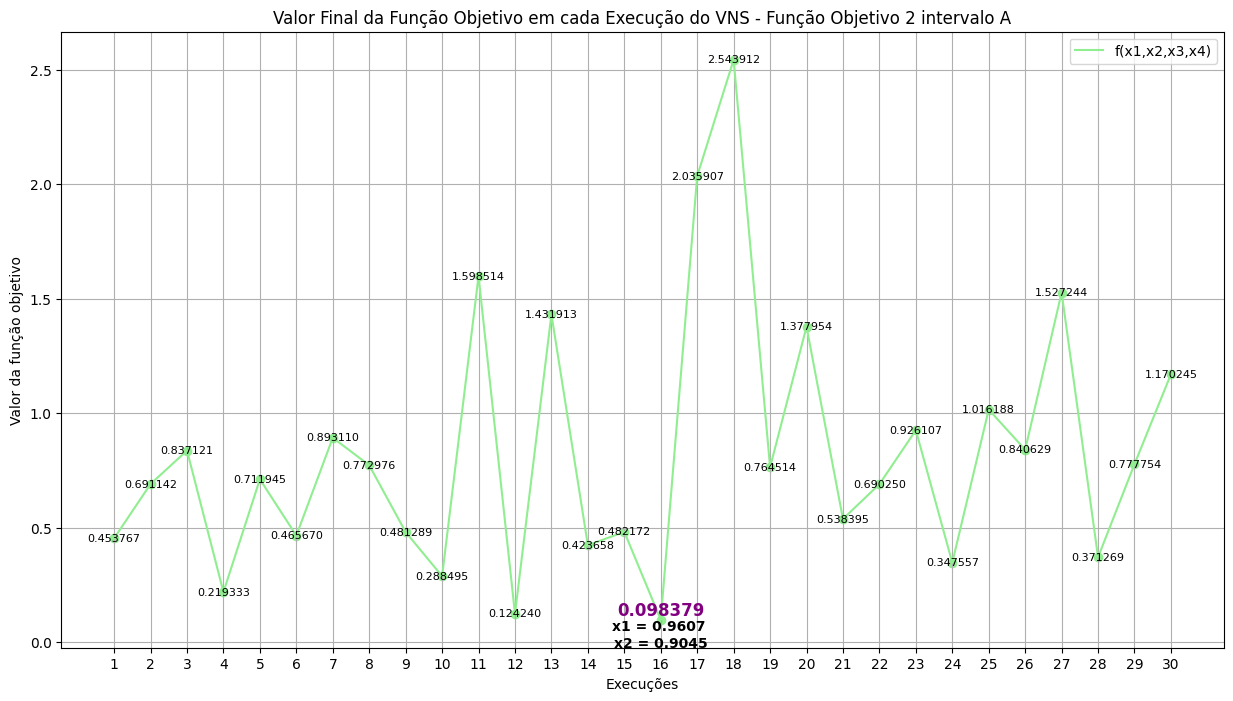

In [74]:
objetivoFinalCadaIteracao(vns_2a, 'f(x1,x2,x3,x4)', 'VNS - Fun√ß√£o Objetivo 2 intervalo A')


#### Intervalo 2B

In [75]:
vns_2b = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2b = intervalo2_b[0]  
max_2b = intervalo2_b[1] 

qtdVariaveisDecisao=4

for i in range(30):
    # Chamada ao VNS com a quantidade de vari√°veis de decis√£o definida como 4
    solucao = vns(funcao_objetivo_02, [min_2b]*qtdVariaveisDecisao, [max_2b]*qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    # Armazenando os resultados no dicion√°rio
    vns_2b['x1'].append(solucao[0])
    vns_2b['x2'].append(solucao[1])
    vns_2b['x3'].append(solucao[2])
    vns_2b['x4'].append(solucao[3])
    vns_2b['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(solucao))

# Imprimindo os resultados
print(vns_2b)


{'x1': [np.float64(1.2629140902164981), np.float64(0.9882429066808541), np.float64(0.9288660782974354), np.float64(0.8696300937413161), np.float64(0.7669676952717385), np.float64(0.8547520271476544), np.float64(0.6677087369345648), np.float64(0.7789713335959443), np.float64(1.10724872437997), np.float64(0.8883112994797805), np.float64(1.0601069123601483), np.float64(1.0692336246032061), np.float64(0.9607233312108481), np.float64(1.1881465300512604), np.float64(0.8126800020247096), np.float64(1.0175016179739715), np.float64(0.6086539717585643), np.float64(1.016560788312964), np.float64(1.1306448442572459), np.float64(1.0551884950685122), np.float64(0.8785346074268875), np.float64(0.9333724339021464), np.float64(0.6417858709258292), np.float64(1.1083188948041751), np.float64(1.1947441558173453), np.float64(0.46077000344782976), np.float64(0.8749299968714598), np.float64(1.012973382811969), np.float64(0.9850578379106667), np.float64(-0.7878643913459548)], 'x2': [np.float64(1.6130312770668

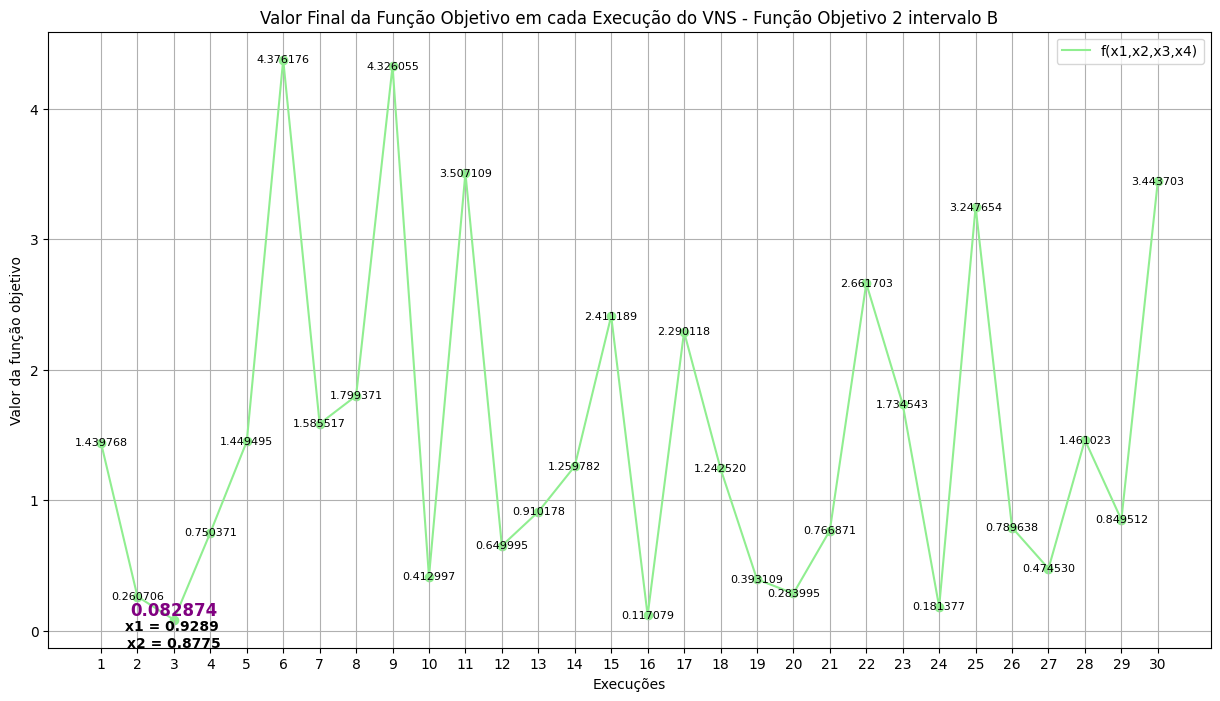

In [76]:
objetivoFinalCadaIteracao(vns_2b, 'f(x1,x2,x3,x4)', 'VNS - Fun√ß√£o Objetivo 2 intervalo B')

#### Fun√ß√£o para exibir o boxplot

In [77]:
def exibirBoxplot(resultadosComparar, titulo, cor):
    fig, ax = plt.subplots(figsize=(6, 4))

    sns.boxplot(y=resultadosComparar, ax=ax, color=cor)

    ax.set_title('VNS', fontsize=10, fontweight='bold')
    ax.set_ylabel('Valor da Fun√ß√£o Objetivo', fontsize=10)

    fig.suptitle(titulo, fontsize=12, fontweight='bold')

    plt.show()


    """def exibirBoxplot(resultadosComparar, titulo, cor):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    sns.boxplot(y=resultadosComparar[0], ax=ax1, color=cor)
    sns.boxplot(y=resultadosComparar[1], ax=ax2, color=cor)

    ax1.set_title('SA', fontsize=10, fontweight='bold')
    ax1.set_ylabel('Valor da Fun√ß√£o Objetivo', fontsize=10)
    ax2.set_title('ILS', fontsize=10, fontweight='bold')
    
    fig.suptitle(titulo, fontsize=10, fontweight='bold')

    plt.show()"""

#### Fun√ß√£o para gerar as estatisticas

In [78]:
def estatisticas(resultadosComparar, nome_funcao_objetivo):
    estatisticas = {'algoritmo': [], 'minimo': [], 'maximo': [], 'media': [], 'dp': [], 'x_do_minimo': [], 'y_do_minimo': []}
   
    algoritmos = ['VNS']  # Aqui s√≥ tem VNS, mas depois adicione SA se necess√°rio

    for i, resultado in enumerate(resultadosComparar):
        objetivo = resultado[nome_funcao_objetivo]
        estatisticas['algoritmo'].append(algoritmos[i])
        estatisticas['minimo'].append(np.min(objetivo))
        estatisticas['maximo'].append(np.max(objetivo))
        estatisticas['media'].append(np.mean(objetivo))
        estatisticas['dp'].append(np.std(objetivo))
        indice_minimo = np.argmin(objetivo)
        estatisticas['x_do_minimo'].append(resultado['x1'][indice_minimo])  # Para x1
        estatisticas['y_do_minimo'].append(resultado['x2'][indice_minimo])  # Para x2
    
    return pd.DataFrame(estatisticas)

  algoritmo    minimo    maximo     media        dp  x_do_minimo  y_do_minimo
0       VNS  0.001004  0.099875  0.029733  0.027288    -0.000407    -0.005019


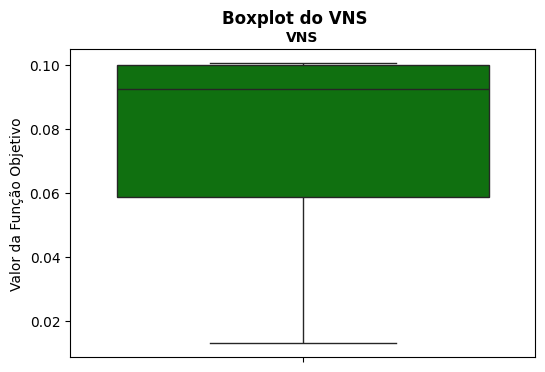

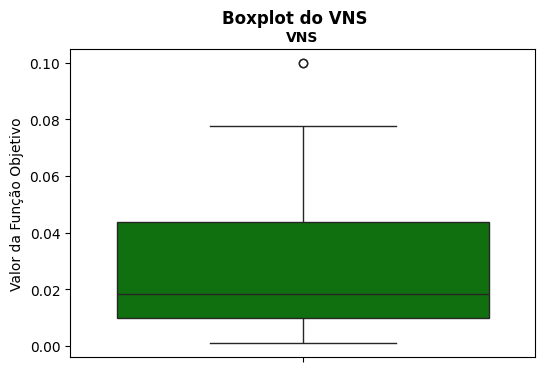

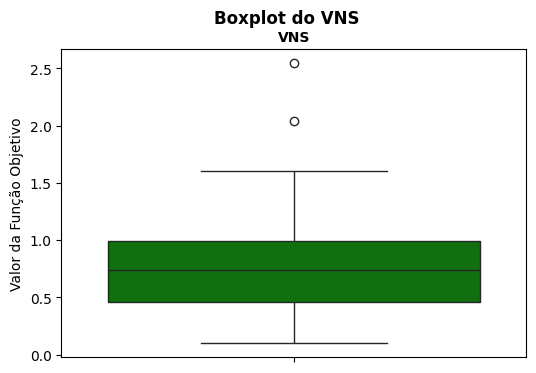

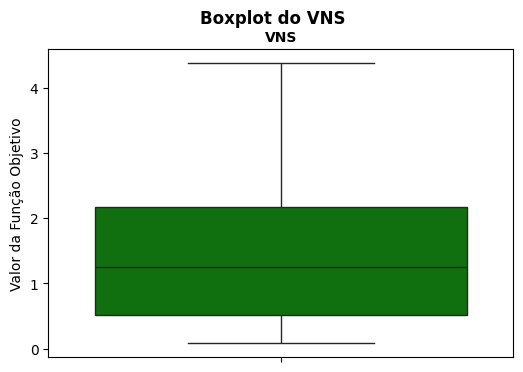

In [79]:
# Calcular as estat√≠sticas para o VNS e o SA posteriormente
estatisticas_vns = estatisticas([vns_1b], 'f(x1,x2)')

print(estatisticas_vns)

#resultadosComparar 
exibirBoxplot(vns_1a['f(x1,x2)'], 'Boxplot do VNS', 'green')
exibirBoxplot(vns_1b['f(x1,x2)'], 'Boxplot do VNS', 'green')
exibirBoxplot(vns_2a['f(x1,x2,x3,x4)'], 'Boxplot do VNS', 'green')
exibirBoxplot(vns_2b['f(x1,x2,x3,x4)'], 'Boxplot do VNS', 'green')

### 2.2 Simulated Annealing (SA)

#### 2.2.1. Conceito do Algoritmo

O **Simulated Annealing** √© inspirado no processo de recozimento em metalurgia:

1- **Temperatura alta** ‚Üí Aceita solu√ß√µes piores (explora√ß√£o).

2- **Temperatura baixa** ‚Üí Aceita apenas melhoras (exploitation).

3- **Resfriamento gradual** ‚Üí Reduz a temperatura ao longo do tempo.

#### 2.2.2 Passos do algor√≠tmo

```python
# 1. INICIALIZA√á√ÉO
x_atual ‚Üê SOLU√á√ÉO_ALEAT√ìRIA(limites, dimensao)  # Gera solu√ß√£o inicial
f_atual ‚Üê funcao_objetivo(x_atual)
T ‚Üê 1000                                        # Temperatura inicial
alpha ‚Üê 0.95                                    # Taxa de resfriamento
historico_melhores ‚Üê [f_atual]                  # Armazena hist√≥rico

# 2. LOOP TERMAL PRINCIPAL
ENQUANTO T > 0.01 FA√áA:
    PARA i DE 1 AT√â 100 FA√áA:                   # Itera√ß√µes por temperatura
        
        # 2.1 GERA√á√ÉO DE VIZINHO
        x_vizinho ‚Üê PERTURBA(x_atual, limites)
        f_vizinho ‚Üê funcao_objetivo(x_vizinho)
        delta ‚Üê f_vizinho - f_atual
        
        # 2.2 CRIT√âRIO DE ACEITA√á√ÉO
        SE delta < 0 OU rand() < exp(-delta/T) ENT√ÉO:
            x_atual ‚Üê x_vizinho                 # Atualiza solu√ß√£o
            f_atual ‚Üê f_vizinho
            
            # 2.3 ATUALIZA MELHOR SOLU√á√ÉO
            SE f_atual < MIN(historico_melhores):
                melhor_x ‚Üê x_atual
                melhor_f ‚Üê f_atual
    
    # 2.4 RESFRIAMENTO
    T ‚Üê T * alpha                               # Reduz temperatura
    historico_melhores.APPEND(f_atual)          # Registra progresso

RETORNE melhor_x, melhor_f                      # Solu√ß√£o final

#### 2.2.3 Implementa√ß√£o em Python

##### 2.2.3.1 Classe do Simulated Annealing

In [80]:
class SimulatedAnnealing:
    def __init__(self, dimensao, limites, funcao_objetivo):
        self.d = dimensao
        self.limite_inf = limites[0]
        self.limite_sup = limites[1]
        self.funcao_objetivo = funcao_objetivo
    
    def solucao_inicial(self):
        return np.random.uniform(self.limite_inf, self.limite_sup, self.d)
    
    def gerar_vizinho(self, x_atual, passo_max):
        perturbacao = np.random.uniform(-passo_max, passo_max, self.d)
        x_vizinho = x_atual + perturbacao
        return np.clip(x_vizinho, self.limite_inf, self.limite_sup)
    
    def executar(self, n_execucoes = 30, T_inicial = 1000, T_final = 0.01, alpha = 0.95, iteracoes_T = 150, passo_max = None):
        if passo_max is None:
            passo_max = (self.limite_sup - self.limite_inf) * 0.1 # Usa 10% como o padr√£o
        
        resultados = []
        melhores_x = []
        
        for _ in range(n_execucoes):
            x_atual = self.solucao_inicial()
            f_atual = self.funcao_objetivo(x_atual)
            T = T_inicial
            melhor_x = x_atual.copy()
            melhor_f = f_atual
            
            while T > T_final:
                for _ in range(iteracoes_T):
                    x_vizinho = self.gerar_vizinho(x_atual, passo_max)
                    f_vizinho = self.funcao_objetivo(x_vizinho)
                    
                    delta_f = f_vizinho - f_atual
                    
                    if delta_f < 0 or np.random.random() < math.exp(-delta_f / T):
                        x_atual, f_atual = x_vizinho, f_vizinho
                        
                        if f_atual < melhor_f:
                            melhor_f = f_atual
                            melhor_x = x_atual.copy()
                
                T *= alpha  # Resfriamento
            
            resultados.append(melhor_f)
            melhores_x.append(melhor_x)
        
        return {
            'resultados': np.array(resultados),
            'melhores_x': np.array(melhores_x),
            'media': np.mean(resultados),
            'minimo': np.min(resultados),
            'maximo': np.max(resultados),
            'desvio': np.std(resultados)
        }

#### 2.2.4 Execu√ß√£o para Todos os Problemas

##### 2.2.4.1 Configura√ß√£o dos Problemas

In [81]:
problemas = [
    {'nome': '1 a) d = 2 [-100,100]', 'd': 2, 'limites': (-100, 100)},
    {'nome': '1 b) d = 2 [-20,20]', 'd': 2, 'limites': (-20, 20)},
    {'nome': '2 c) d = 4 [-10,10]', 'd': 4, 'limites': (-10, 10)},
    {'nome': '2 d) d = 4 [-2,2]', 'd': 4, 'limites': (-2, 2)}
]

##### 2.2.4.2 Execu√ß√£o e An√°lise


 === 1 a) d = 2 [-100,100] ===
M√©dia: 0.095791
M√≠nimo: 0.010566
M√°ximo: 0.114662
Desvio padr√£o: 0.020858
Melhor x encontrado: [-0.00878019 -0.01880609]


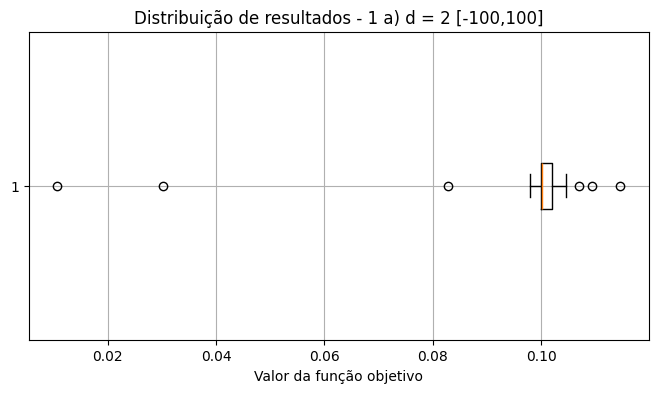


 === 1 b) d = 2 [-20,20] ===
M√©dia: 0.034559
M√≠nimo: 0.001289
M√°ximo: 0.099875
Desvio padr√£o: 0.026626
Melhor x encontrado: [-0.00249347  0.0053859 ]


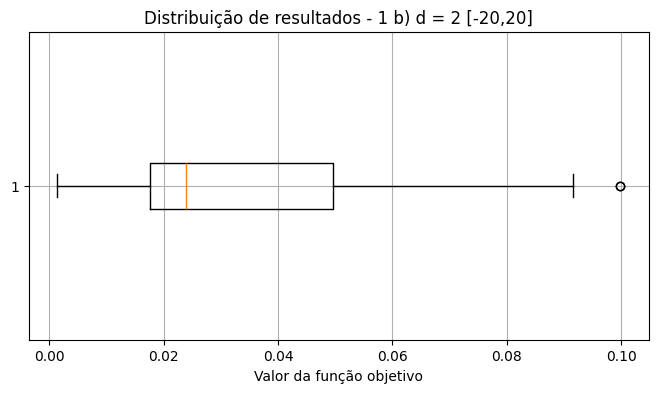


 === 2 c) d = 4 [-10,10] ===


In [ ]:
n_execucoes = 30
T_inicial = 1000

for problema in problemas:
    print(f"\n === {problema['nome']} ===")
    
    # Ajuste autom√°tico de par√¢metros
    intervalo = problema['limites'][1] - problema['limites'][0]
    passo_max = intervalo * 0.1  # Passo inicial = 10% do intervalo

    # Define qual fun√ß√£o objetivo usar
    funcao = funcao_objetivo_01 if problema['d'] == 2 else funcao_objetivo_01

    # Executa SA
    sa = SimulatedAnnealing(
        dimensao = problema['d'],
        limites = problema['limites'],
        funcao_objetivo = funcao
    )
    
    resultado = sa.executar(
        n_execucoes = n_execucoes,
        T_inicial = T_inicial,
        passo_max = passo_max
    )
    
    valores_objetivo = resultado['resultados']
    melhores_x = resultado['melhores_x']
    
    # Estat√≠sticas
    media = resultado['media']
    minimo = resultado['minimo']
    maximo = resultado['maximo']
    desvio = resultado['desvio']
    melhor_x_global = melhores_x[np.argmin(valores_objetivo)]

    # Exibi√ß√£o dos resultados
    print(f"M√©dia: {media:.6f}")
    print(f"M√≠nimo: {minimo:.6f}")
    print(f"M√°ximo: {maximo:.6f}")
    print(f"Desvio padr√£o: {desvio:.6f}")
    print(f"Melhor x encontrado: {melhor_x_global}")
    
    # Boxplot
    plt.figure(figsize=(8, 4))
    plt.boxplot(valores_objetivo, vert=False)
    plt.title(f"Distribui√ß√£o de resultados - {problema['nome']}")
    plt.xlabel("Valor da fun√ß√£o objetivo")
    plt.grid(True)
    plt.show()
